# Problem Definition
**Using machine learning to create a model that predicts which passengers survived the Titanic shipwreck**
> This notebook looks into using python-based machine learning and data sscience libraries in an attempt to build machine learning model capable of predicting whether or not an individual died based on the socio-economic attributes

# Data
The original data came from Kaggle **Titanic - Machine Learning from Disaster** https://www.kaggle.com/competitions/titanic

# Evaluation
If we can reach at least 75% accuracy at predicting whether or not a passenger died as a result of the the shipwreck during the proof of concept, we will pursue the project.
 
# Features
* survival = Survival, 	0 = No, 1 = Yes
* pclass = Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	= Sex	
* Age = Age in years	
* sibsp = number of siblings / spouses aboard the Titanic	
* parch	= of parents / children aboard the Titanic	
* ticket = Ticket number	
* fare=	Passenger fare	
* cabin	= Cabin number	
* embarked = Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
* Variable = Notes
* pclass: A proxy for socio-economic status (SES)
  1st = Upper
  2nd = Middle
  3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

# Prepare Data analytics Tools and analyze the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_data= pd.read_csv('train (1).csv')

In [3]:
test_data= pd.read_csv('test (9).csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [7]:
len(train_data)

891

In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_data['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [11]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
train_data['Parch'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64>

In [15]:
train_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [16]:
train_data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [17]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked'>

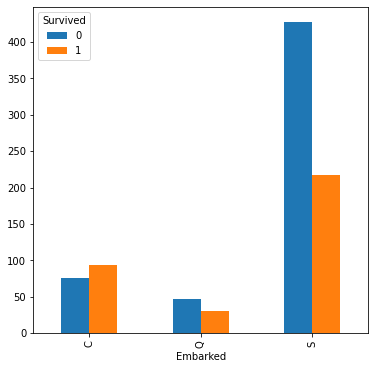

In [19]:
pd.crosstab(train_data['Embarked'], train_data['Survived']).plot.bar(figsize= (6, 6))

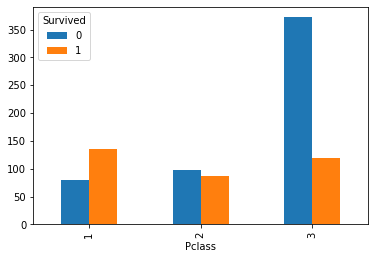

In [20]:
pd.crosstab(train_data['Pclass'], train_data['Survived']).plot.bar();

In [21]:
pd.crosstab(train_data['Pclass'], train_data['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [22]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
pd.crosstab(train_data['SibSp'], train_data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<AxesSubplot:xlabel='SibSp'>

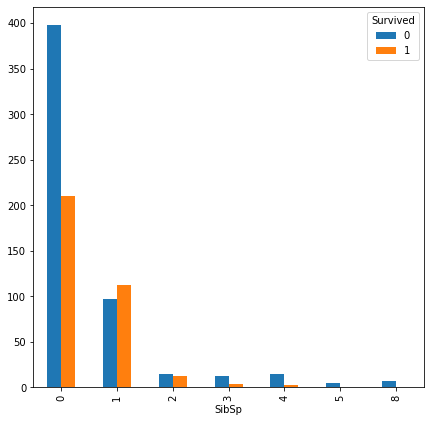

In [24]:
pd.crosstab(train_data['SibSp'], train_data['Survived']).plot.bar(figsize= (7, 7))

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
pd.crosstab(train_data['Sex'],train_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex'>

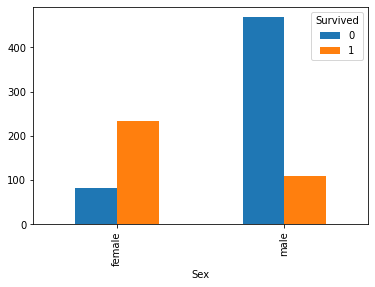

In [27]:
pd.crosstab(train_data['Sex'], train_data['Survived']).plot.bar()

<AxesSubplot:>

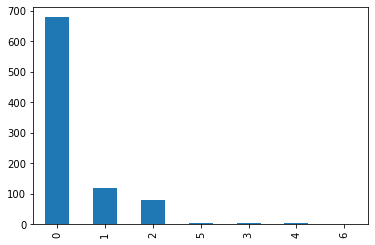

In [28]:
train_data['Parch'].value_counts().plot.bar()

<AxesSubplot:>

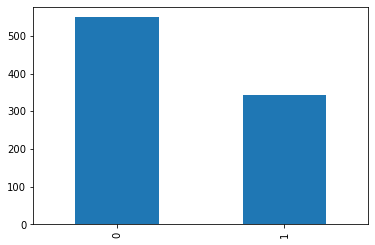

In [29]:
train_data['Survived'].value_counts().plot.bar()

<AxesSubplot:>

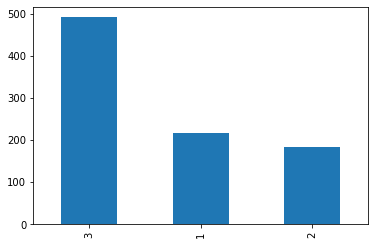

In [30]:
train_data['Pclass'].value_counts().plot.bar()

<AxesSubplot:>

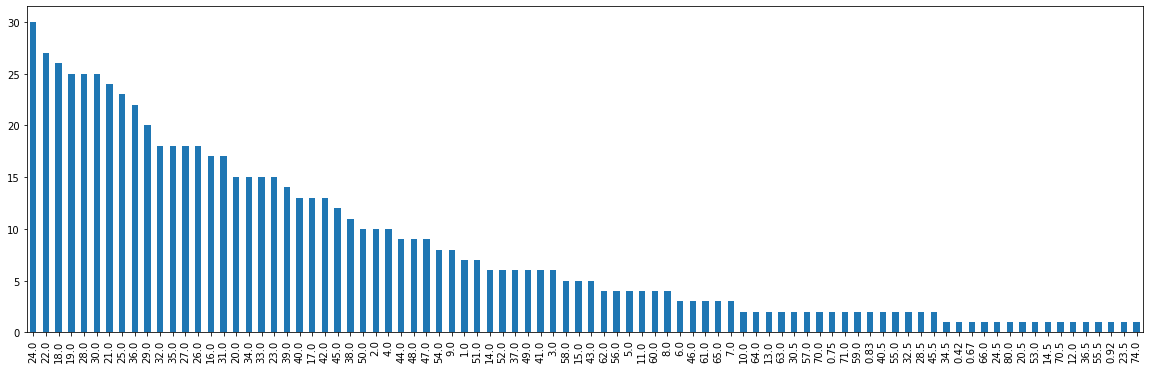

In [31]:
train_data['Age'].value_counts().plot.bar(figsize= (20, 6))

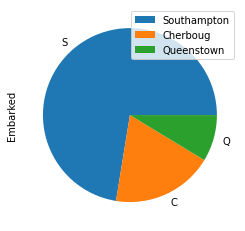

In [32]:
train_data.Embarked.value_counts().plot.pie()
plt.legend(['Southampton', 'Cherboug', 'Queenstown'])

# Now let us preprocess the data

In [33]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [38]:
data= train_data[['Pclass', 'Sex', 'Survived']]
data1= (data[data['Survived']==1]).groupby(['Pclass', 'Sex']).count().rename(columns= {'survived': 'Survived'})
data2= (data[data['Survived']==0]).groupby(['Pclass', 'Sex']).count().rename(columns= {'survived': 'not survived'})
data3= data1.merge(data2, left_on= ['Pclass', 'Sex'], right_on= ['Pclass', 'Sex'])

data3

Survived_x  Survived_y
Pclass Sex                           
1      female          91           3
       male            45          77
2      female          70           6
       male            17          91
3      female          72          72
       male            47         300

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train_data_copy= train_data.copy()

In [41]:
for item in [train_data, test_data]:
    item['Title']= item['Name'].str.extract('([A-Za-z]+)\.')

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [43]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [44]:
pd.crosstab(train_data.Title, train_data.Survived)

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


<AxesSubplot:xlabel='Title'>

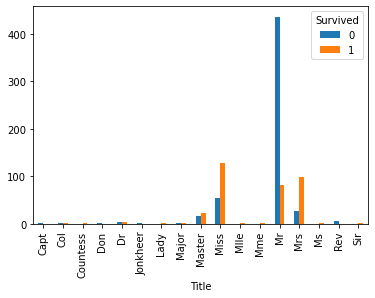

In [45]:
pd.crosstab(train_data.Title, train_data.Survived).plot.bar()

In [46]:
for item in [train_data, test_data]:
    item['Title']= item['Title'].replace(['Mlle', 'Ms'], 'Miss')
    item['Title']= item['Title'].replace(['Mme'], 'Mrs')
    item['Title']= item['Title'].replace(['Capt', 'col', 'Major', 'Rev', 'Dr'], 'Workers')
    item['Title']= item['Title'].replace(['Don', 'Dona', 'Countess', 'Lady','Jonkheer', 'Sir'], 'VVIP')

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [48]:
train_data.Title.value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Workers     16
VVIP         5
Col          2
Name: Title, dtype: int64

In [49]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [50]:
for item in [train_data, test_data]:
    item['Surname']= item['Name'].apply(lambda x: x.split(', ')[0].strip())
    surname_count= dict(item['Surname'].value_counts())
    item['Surname_group']= item['Surname'].apply(lambda x: surname_count[x] )

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Surname_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,2


In [52]:
train_data.Surname.value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 667, dtype: int64

In [53]:
train_data.drop('Name', axis= 1, inplace= True)
test_data.drop('Name', axis= 1, inplace= True)

# Check for Outliers and remove them

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

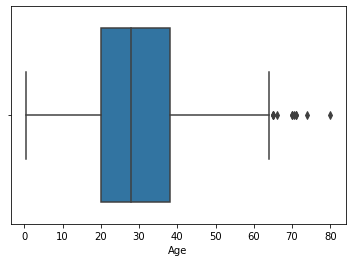

In [54]:
import seaborn as sns
sns.boxplot(train_data['Age'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

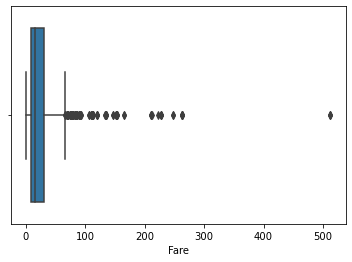

In [55]:
sns.boxplot(train_data['Fare'])

In [56]:
for item in [train_data, test_data]:
    q1= item['Fare'].quantile(0.25)
    q3= item['Fare'].quantile(0.75)
    iqr= q3-q1
    item['Fare']= item['Age'][~((item['Fare']<(q1- 1.5*iqr))| (item['Fare']> (q3+1.5*iqr)))]
    
    
for item in [train_data, test_data]:
    q1= item['Age'].quantile(0.25)
    q3= item['Age'].quantile(0.75)
    iqr= q3-q1
    item['Age']= item['Age'][~((item['Age']<(q1-1.5*iqr))| (item['Age']> (q3+1.5**iqr)))]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

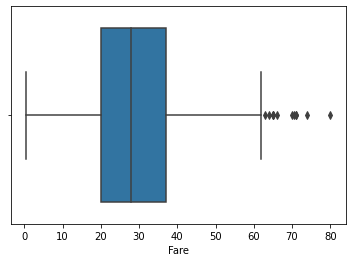

In [57]:
sns.boxplot(train_data['Fare'])

In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Surname_group
0,1,0,3,male,22.0,1,0,A/5 21171,22.0,NaN,S,Mr,Braund,2
1,2,1,1,female,38.0,1,0,PC 17599,NaN,C85,C,Mrs,Cumings,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,26.0,NaN,S,Miss,Heikkinen,1
3,4,1,1,female,35.0,1,0,113803,35.0,C123,S,Mrs,Futrelle,2
4,5,0,3,male,35.0,0,0,373450,35.0,NaN,S,Mr,Allen,2


In [59]:
train_data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare             278
Cabin            687
Embarked           2
Title              0
Surname            0
Surname_group      0
dtype: int64

In [60]:
train_data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare             278
Cabin            687
Embarked           2
Title              0
Surname            0
Surname_group      0
dtype: int64

# Convert strings to integers and fill all missing values

In [61]:
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_data[label]= content.fillna(content.median())

In [62]:
train_data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Title              0
Surname            0
Surname_group      0
dtype: int64

In [63]:
train_data.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Title             object
Surname           object
Surname_group      int64
dtype: object

In [64]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_data[label]= content.fillna(test_data.median())

C:\Users\USER\AppData\Local\Temp/ipykernel_5304/2544403299.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data[label]= content.fillna(test_data.median())


In [65]:
test_data.dtypes

PassengerId        int64
Pclass             int64
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Title             object
Surname           object
Surname_group      int64
dtype: object

In [66]:
test_data.isna().sum()

PassengerId        0
Pclass             0
Sex                0
Age               86
SibSp              0
Parch              0
Ticket             0
Fare             138
Cabin            327
Embarked           0
Title              0
Surname            0
Surname_group      0
dtype: int64

In [67]:
for label, content in train_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_data[label]= content.astype('category')
        train_data[label]= pd.Categorical(content).codes + 1

In [68]:
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data[label]= content.astype('category')
        test_data[label]= pd.Categorical(content).codes + 1

In [69]:
test_data.isna().sum()

PassengerId        0
Pclass             0
Sex                0
Age               86
SibSp              0
Parch              0
Ticket             0
Fare             138
Cabin              0
Embarked           0
Title              0
Surname            0
Surname_group      0
dtype: int64

In [70]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_data[label]= content.fillna(content.median())

In [71]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Surname          0
Surname_group    0
dtype: int64

In [72]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Surname          0
Surname_group    0
dtype: int64

# Now lets use a machine learning model to train our data and tune them to get the best parameters

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val= train_test_split(train_data.drop('Survived', axis= 1), train_data['Survived'], random_state= 42, test_size= 0.2)

In [74]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((712, 13), (712,), (179, 13), (179,))

In [75]:
models = {'logistic':LogisticRegression(),
         'Random forest':RandomForestClassifier(),
          'KNN': KNeighborsClassifier()}

In [76]:
def model_select(X_train, y_train, X_val, y_val):
    model_score = {}
    for title, model in models.items():
        model.fit(X_train, y_train)
        model_score[title]= model.score(X_val, y_val)
    return model_score
    

In [77]:
model_select(X_train, y_train, X_val, y_val)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic': 0.7094972067039106,
 'Random forest': 0.8212290502793296,
 'KNN': 0.6089385474860335}

In [78]:
log_reg= {'C': np.logspace(-4, 4, 2),
          'solver': ['liblinear']}


random_forest= {'min_samples_split':[2,4,6],
               'min_samples_leaf': [5,10, 15, 20],
               'n_estimators': np.arange(10,1000,50)}

In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [80]:
logrscv= RandomizedSearchCV(estimator= LogisticRegression(),
                        param_distributions= log_reg,
                        random_state= 42,
                        verbose= 2,
                        n_iter= 20)

In [81]:
logrscv.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.e-04, 1.e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=2)

In [82]:
logrscv.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [83]:
logrscv.score(X_val, y_val)

0.7988826815642458

In [84]:
logrsgr= GridSearchCV(estimator= LogisticRegression(),
                        param_grid= log_reg,
                        verbose= 2)
logrsgr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e+04]), 'solver': ['liblinear']},
             verbose=2)

In [85]:
logrsgr.best_params_

{'C': 10000.0, 'solver': 'liblinear'}

In [86]:
logrsgr.score(X_val, y_val)

0.7988826815642458

In [87]:
log_preds= logrsgr.predict(X_val)

In [88]:
from sklearn.metrics import classification_report
print (classification_report(y_val, log_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [89]:
randomrscv= RandomizedSearchCV(estimator= RandomForestClassifier(),
                           param_distributions= random_forest,
                           random_state= 42,
                           verbose= 2,
                           n_iter= 20)
randomrscv.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.8s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.8s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.6s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.6s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.6s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.9s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.9s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.9s
[CV] END min_samples_leaf=10, min_samples_split=4, n_estimators=660;

[CV] END min_samples_leaf=15, min_samples_split=4, n_estimators=610; total time=   1.8s
[CV] END min_samples_leaf=15, min_samples_split=4, n_estimators=610; total time=   1.8s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.7s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.7s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.8s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.7s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.7s


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=2)

In [90]:
randomrscv.best_params_

{'n_estimators': 760, 'min_samples_split': 2, 'min_samples_leaf': 5}

In [91]:
randomrscv.score(X_val, y_val)

0.8100558659217877

In [92]:
log2_rscv= RandomizedSearchCV(estimator= LogisticRegression(),
                        param_distributions= log_reg,
                        random_state= 42,
                        verbose= 2,
                         cv= 30,
                        n_iter= 100)
log2_rscv.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 30 folds for each of 2 candidates, totalling 60 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solv

RandomizedSearchCV(cv=30, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.e-04, 1.e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=2)

In [93]:
log2_rscv.score(X_val, y_val)

0.7988826815642458

gr= GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid= random_forest,
                        verbose= 2)
gr.fit(X_train,y_train)

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
a= cross_val_score(RandomForestClassifier(), train_data.drop('Survived', axis= 1), train_data['Survived'])
np.mean(a)

0.8294206264515724

In [96]:
randomrscv.fit(train_data.drop('Survived', axis= 1), train_data['Survived'])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.7s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.7s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.7s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.7s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.7s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.1s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.0s
[CV] END min_samples_leaf=10, min_samples_split=4, n_estimators=660;

[CV] END min_samples_leaf=15, min_samples_split=4, n_estimators=610; total time=   2.2s
[CV] END min_samples_leaf=15, min_samples_split=4, n_estimators=610; total time=   2.7s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.9s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.9s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   1.1s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.8s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.9s


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=2)

In [97]:
random_preds= randomrscv.predict(test_data)
random_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [98]:
random_forest= pd.DataFrame({'passengerId': test_data['PassengerId'],
                            'Survived':random_preds })

In [99]:
random_forest.head()

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [100]:
random_forest.to_csv('sampleSubmission.csv', index= False)

In [101]:
train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Surname_group
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.015543,-0.000637,0.012985,0.068349,-0.039837,-0.019629
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,-0.112131,0.276235,-0.176509,-0.074908,-0.058100,-0.049188
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.275106,-0.537419,0.173511,-0.167634,0.052529,0.113262
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,0.119969,-0.137704,0.118492,0.058948,0.020991,-0.118485
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.912762,0.164550,-0.031903,0.436187,0.047728,-0.203841
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,-0.259111,-0.024829,0.071480,-0.190974,-0.016098,0.667568
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,-0.188389,0.033585,0.043351,-0.109424,-0.047632,0.600538
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.081546,-0.176515,0.011146,-0.075323,0.046592,0.058864
Fare,0.015543,-0.112131,-0.275106,0.119969,0.912762,-0.259111,-0.188389,-0.081546,1.000000,0.086029,0.033624,0.403565,0.042350,-0.216484
Cabin,-0.000637,0.276235,-0.537419,-0.137704,0.164550,-0.024829,0.033585,-0.176515,0.086029,1.000000,-0.070245,0.031426,0.003349,-0.045117


# Lets work on the real data without using any feature engineering

In [102]:
train_data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
for title, content in train_data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_data_copy[title]= content.fillna(content.median())

In [104]:
for title, content in train_data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_data_copy[title]= content.astype('category')
        train_data_copy[title]= pd.Categorical(content).codes + 1

In [105]:
train_data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3


In [106]:
train_data_copy.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


In [107]:
test_data_copy= pd.read_csv('test (9).csv')

In [108]:
for title, content in test_data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_data_copy[title]= content.fillna(content.median())

In [109]:
for title, content in test_data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data_copy[title]= content.astype('category')
        test_data_copy[title]= pd.Categorical(content).codes + 1

In [110]:
train_data_copy.drop(['Name', 'Fare'], axis= 1, inplace= True)

In [111]:
test_data_copy.drop(['Fare','Name'], axis= 1, inplace= True)

In [112]:
 randomrscv.fit(train_data_copy.drop('Survived', axis= 1), train_data_copy['Survived'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.9s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.9s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   1.0s
[CV] END min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.9s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.4s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.1s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.1s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.1s
[CV] END min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   1.2s
[CV] END min_samples_leaf=10, min_samples_split=4, n_estimators=660;

[CV] END min_samples_leaf=15, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END min_samples_leaf=15, min_samples_split=4, n_estimators=610; total time=   2.1s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   0.8s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   1.1s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   1.0s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   1.1s
[CV] END min_samples_leaf=15, min_samples_split=2, n_estimators=260; total time=   1.1s


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=2)

In [113]:
y_preds= randomrscv.predict(test_data_copy)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [114]:
test= pd.read_csv('test (9).csv')

In [115]:
test_df= pd.DataFrame({'passengerId': test['PassengerId'],
                            'Survived':y_preds })
test_df

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [116]:
test_df.to_csv('SampleSubmission.csv', index= False)

# Conclusion
* The data that the feature was not engineered performed well on generalization than data that has engineered features